In [32]:
import pandas as pd

Рост супермаркетов в большинстве населенных городов растет, а также высока конкукунеций на рынке. Набор данных является одним из исторических продаж супермаркетной компании, которая зафиксировала данные в 3 разных филиалах за 3 месяца. Методы прогнозной аналитики данных легко применить с этим набором данных.

### Информация об атрибутах

Идентификатор счета-фактуры: Идентификационный номер накладной, сгенерированной компьютером

Ветвь: Ветвь суперцентра (3 ветви доступны, идентифицированные A, B и C).

Город: Расположение суперцентров

Тип клиента: Тип клиентов, записанный Участниками для клиентов, использующих карту участника, и Обычный для без карты участника.

Пол: Пол типа клиента

Линейка продуктов: Общие группы классификации товаров - Электронные аксессуары, Модные аксессуары, Еда и напитки, Здоровье и красота, Дом и образ жизни, Спорт и путешествия

Цена за единицу: Цена каждого продукта в долларах США

Количество: Количество продуктов, приобретенных клиентом

Налог: 5% налоговый сбор за покупку клиентом

Итого: Общая стоимость, включая налоги

Дата: Дата покупки (запись доступна с января 2019 года по март 2019 года)

Время: Время покупки (с 10:00 до 21:00)

Оплата: Оплата, используемая клиентом для покупки (3 способа - наличные, кредитная карта и кошелек)

COGS: Стоимость проданных товаров

Процент валовой маржи: процент валовой маржи

Валовой доход: Валовой доход



In [33]:
df = pd.read_csv("sales.csv", index_col="Invoice ID")

In [34]:
df.head(2)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income

In [36]:
df["Gender"].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [37]:
for key in df.keys():
   
    print(df[key].value_counts(normalize=True))

A    0.340
B    0.332
C    0.328
Name: Branch, dtype: float64
Yangon       0.340
Mandalay     0.332
Naypyitaw    0.328
Name: City, dtype: float64
Member    0.501
Normal    0.499
Name: Customer type, dtype: float64
Female    0.501
Male      0.499
Name: Gender, dtype: float64
Fashion accessories       0.178
Food and beverages        0.174
Electronic accessories    0.170
Sports and travel         0.166
Home and lifestyle        0.160
Health and beauty         0.152
Name: Product line, dtype: float64
83.77    0.003
39.62    0.002
24.74    0.002
19.15    0.002
73.47    0.002
         ...  
57.95    0.001
47.65    0.001
42.82    0.001
48.09    0.001
88.34    0.001
Name: Unit price, Length: 943, dtype: float64
10    0.119
1     0.112
4     0.109
7     0.102
5     0.102
6     0.098
9     0.092
2     0.091
3     0.090
8     0.085
Name: Quantity, dtype: float64
10.3260    0.002
4.4640     0.002
4.1540     0.002
9.0045     0.002
22.4280    0.002
           ...  
7.2135     0.001
19.5895    0.001


<AxesSubplot:>

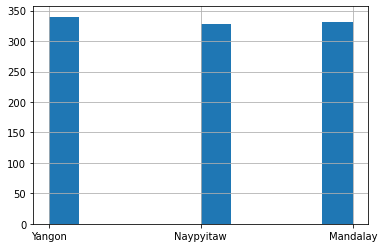

In [38]:
df['City'].hist()

In [39]:
import seaborn as sns

<AxesSubplot:xlabel='Payment', ylabel='Count'>

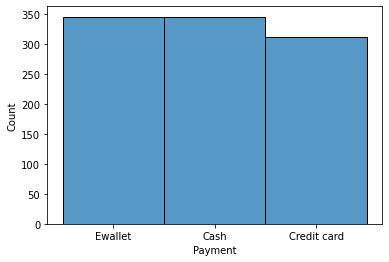

In [43]:
sns.histplot(df['Payment'])

<AxesSubplot:xlabel='Total', ylabel='Count'>

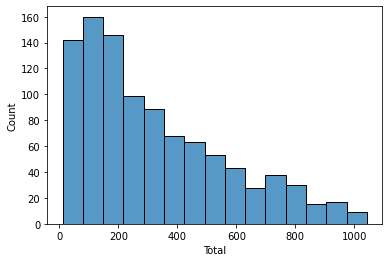

In [44]:
sns.histplot(df['Total'])

In [50]:
df['payment_bin'] = pd.cut(df['Total'], 10)

In [55]:
df.groupby('payment_bin')['cogs'].count()

payment_bin
(9.647, 113.876]      233
(113.876, 217.073]    215
(217.073, 320.27]     146
(320.27, 423.467]     110
(423.467, 526.664]     91
(526.664, 629.861]     68
(629.861, 733.059]     45
(733.059, 836.256]     51
(836.256, 939.453]     25
(939.453, 1042.65]     16
Name: cogs, dtype: int64

In [58]:
df['Total'].mean()

322.96674900000005

In [59]:
df['Total'].median()

253.848

In [61]:
df.mean()

/tmp/ipykernel_99/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Unit price                  55.672130
Quantity                     5.510000
Tax 5%                      15.379369
Total                      322.966749
cogs                       307.587380
gross margin percentage      4.761905
gross income                15.379369
Rating                       6.972700
dtype: float64

In [62]:
df.median()

/tmp/ipykernel_99/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Unit price                  55.230000
Quantity                     5.000000
Tax 5%                      12.088000
Total                      253.848000
cogs                       241.760000
gross margin percentage      4.761905
gross income                12.088000
Rating                       7.000000
dtype: float64

In [64]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


<AxesSubplot:>

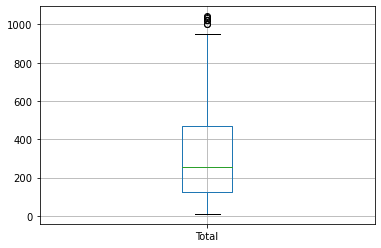

In [65]:
df.boxplot('Total')

In [91]:
df[['Total', 'Quantity']].corr()

,Total,Quantity
Total,1.00000,0.70551
Quantity,0.70551,1.00000


In [98]:
df.groupby('payment_bin')['Quantity'].agg(['count', 'mean', 'median'])

,count,mean,median
payment_bin,,,
"(9.647, 113.876]",233,2.446352,2.0
"(113.876, 217.073]",215,4.786047,4.0
"(217.073, 320.27]",146,5.486301,5.0
"(320.27, 423.467]",110,6.500000,6.0
"(423.467, 526.664]",91,7.131868,7.0
"(526.664, 629.861]",68,7.632353,7.0
"(629.861, 733.059]",45,8.333333,8.0
"(733.059, 836.256]",51,8.980392,9.0
"(836.256, 939.453]",25,9.480000,10.0


<AxesSubplot:xlabel='payment_bin'>

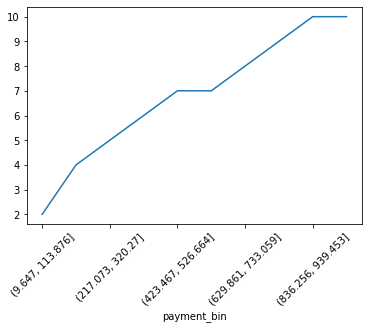

In [101]:
df.groupby('payment_bin')['Quantity'].median().plot(rot=45)

In [105]:
(df['Total']-df['Total'].mean()).abs().mean()

202.07940580800005